# Regression with an Insurance Dataset
## 1- download the dataset and import libraries

In [1]:
# download the dataset from kaggle:
! kaggle competitions download -c playground-series-s4e12
# unzip the dataset:
# ! unzip titanic.zip # this works for linux only
! powershell -Command "Expand-Archive -Path 'playground-series-s4e12.zip'" # this works for windows only

playground-series-s4e12.zip: Skipping, found more recently modified local copy (use --force to force download)


ExpandArchiveHelper : Failed to create file 'C:\Users\Ghaith\Desktop\ML\projects\Regression-with-an-Insurance-Dataset\p
layground-series-s4e12\sample_submission.csv' while expanding the archive file 
'C:\Users\Ghaith\Desktop\ML\projects\Regression-with-an-Insurance-Dataset\playground-series-s4e12.zip' contents as the 
file 'C:\Users\Ghaith\Desktop\ML\projects\Regression-with-an-Insurance-Dataset\playground-series-s4e12\sample_submissio
n.csv' already exists. Use the -Force parameter if you want to overwrite the existing directory 'C:\Users\Ghaith\Deskto
p\ML\projects\Regression-with-an-Insurance-Dataset\playground-series-s4e12\sample_submission.csv' contents when 
expanding the archive file.
At 
C:\WINDOWS\system32\WindowsPowerShell\v1.0\Modules\Microsoft.PowerShell.Archive\Microsoft.PowerShell.Archive.psm1:397 
char:17
+ ...             ExpandArchiveHelper $resolvedSourcePaths $resolvedDestina ...
+                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + Catego

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
train_df = pd.read_csv('playground-series-s4e12/train.csv')
test_df = pd.read_csv('playground-series-s4e12/test.csv')
train_df.describe()




,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [4]:
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [5]:

print("\nNumber of NaN values in each column:")
for i, col in enumerate(train_df.columns):
    print(f"{i+1}. {col}: {train_df[col].isna().sum()}")



Number of NaN values in each column:
1. id: 0
2. Age: 18705
3. Gender: 0
4. Annual Income: 44949
5. Marital Status: 18529
6. Number of Dependents: 109672
7. Education Level: 0
8. Occupation: 358075
9. Health Score: 74076
10. Location: 0
11. Policy Type: 0
12. Previous Claims: 364029
13. Vehicle Age: 6
14. Credit Score: 137882
15. Insurance Duration: 1
16. Policy Start Date: 0
17. Customer Feedback: 77824
18. Smoking Status: 0
19. Exercise Frequency: 0
20. Property Type: 0
21. Premium Amount: 0


## 2- preprocessing


In [6]:
def preprocess_data(df):
    # 1-Drop ID column
    df = df.drop('id', axis=1)
    
    # 2-Convert age into numeric classes and handle NaN values
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    bins = [0, 18, 35, 50, 65, 100]
    df['Age'] = np.digitize(df['Age'], bins=bins[1:]) - 1
    df['Age'] = df['Age'].astype(int)
    df['Age'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min()) * 2 - 1
    
    # 3-Convert gender to binary (-1,1)
    df['Gender'] = df['Gender'].map({'Female': -1, 'Male': 1})
    
    # 4-Convert Annual Income into classes and handle NaN values
    df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].mean())
    df['Annual Income'] = (df['Annual Income'] / 10000).round(2)
    df['Annual Income'] = (df['Annual Income'] - df['Annual Income'].min()) / (df['Annual Income'].max() - df['Annual Income'].min()) * 2 - 1
    
    # 5-Convert Marital Status into three classes (-1,0,1) and handle NaN values
    df['Marital Status'] = df['Marital Status'].fillna('Single')
    df['Marital Status'] = df['Marital Status'].map({'Single': -1, 'Married': 0, 'Divorced': 1})

    # 6-Handle NAN in number of dependents and convert to numeric
    df['Number of Dependents'] = df['Number of Dependents'].fillna(0)
    df['Number of Dependents'] = pd.to_numeric(df['Number of Dependents'])
    df['Number of Dependents'] = (df['Number of Dependents'] - df['Number of Dependents'].min()) / (df['Number of Dependents'].max() - df['Number of Dependents'].min()) * 2 - 1
    
    # 7-Convert Education Level into four classes (-1,-0.33,0.33,1)
    df['Education Level'] = df['Education Level'].map({'High School': -1, "Bachelor's": -0.33, "Master's": 0.33, 'PhD': 1})

    # 8-Convert Occupation into three classes (-1,0,1) and handle NaN values
    df['Occupation'] = df['Occupation'].fillna(df['Occupation'].mode()[0])
    df['Occupation'] = df['Occupation'].map({'Employed': -1, 'Unemployed': 0, 'Self-Employed': 1})

    # 9-Convert Health Score into numbers and dividing by 10 and handle NaN values
    df['Health Score'] = df['Health Score'].fillna(df['Health Score'].mean())
    df['Health Score'] = df['Health Score'].astype(float) / 10
    df['Health Score'] = (df['Health Score'] - df['Health Score'].min()) / (df['Health Score'].max() - df['Health Score'].min()) * 2 - 1
    
    # 10-Convert Location into three classes (-1,0,1) and handle NaN values
    df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
    df['Location'] = df['Location'].map({'Urban': -1, 'Rural': 0, 'Suburban': 1})

    # 11-Convert Policy Type into three classes (-1,0,1)
    df['Policy Type'] = df['Policy Type'].map({'Basic': -1, 'Comprehensive': 0, 'Premium': 1})
    
    # 12-Handle NaN values in Previous Claims and convert to numeric
    df['Previous Claims'] = df['Previous Claims'].fillna(0)
    df['Previous Claims'] = pd.to_numeric(df['Previous Claims'])
    df['Previous Claims'] = (df['Previous Claims'] - df['Previous Claims'].min()) / (df['Previous Claims'].max() - df['Previous Claims'].min()) * 2 - 1

    # 13-Handle Vehicle Age NaN values and convert to numeric
    df['Vehicle Age'] = df['Vehicle Age'].fillna(df['Vehicle Age'].mean())
    df['Vehicle Age'] = pd.to_numeric(df['Vehicle Age'])
    df['Vehicle Age'] = (df['Vehicle Age'] - df['Vehicle Age'].min()) / (df['Vehicle Age'].max() - df['Vehicle Age'].min()) * 2 - 1

    # 14-Handle Credit Score NaN values and normalize by dividing by 200
    df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].mean())
    df['Credit Score'] = df['Credit Score'] / 200
    df['Credit Score'] = (df['Credit Score'] - df['Credit Score'].min()) / (df['Credit Score'].max() - df['Credit Score'].min()) * 2 - 1
    
    # 15-Handle NaN values in Insurance Duration and convert to numeric
    df['Insurance Duration'] = df['Insurance Duration'].fillna(df['Insurance Duration'].mean())
    df['Insurance Duration'] = pd.to_numeric(df['Insurance Duration'])
    df['Insurance Duration'] = (df['Insurance Duration'] - df['Insurance Duration'].min()) / (df['Insurance Duration'].max() - df['Insurance Duration'].min()) * 2 - 1

    # 16-Drop Policy start date
    df = df.drop('Policy Start Date', axis=1)

    # 17-Drop Customer Feedback
    df = df.drop('Customer Feedback', axis=1)

    # 18-Convert smoking status into binary (-1,1)
    df['Smoking Status'] = df['Smoking Status'].map({'No': -1, 'Yes': 1})
    
    # 19-Convert Exercise Frequency into four classes (-1,-0.33,0.33,1)
    df['Exercise Frequency'] = df['Exercise Frequency'].map({'Rarely': -1, 'Monthly': -0.33, 'Weekly': 0.33, 'Daily': 1})
    
    # 20-Convert property type into three classes (-1,0,1)
    df['Property Type'] = df['Property Type'].map({'Apartment': -1, 'Condo': 0, 'House': 1})

    # Create healthy feature (exercise score minus smoking penalty plus health score)
    df['healthy'] = df['Exercise Frequency'].astype(float) - df['Smoking Status'].astype(float) + df['Health Score'].astype(float)
  
    # Drop original features
    df = df.drop(['Health Score','Smoking Status', 'Exercise Frequency'], axis=1)
    
    # # Merge location and property type into a single feature
    # # Location (0,1,2) * 3 + Property Type (0,1,2) gives unique values 0-8
    df['property'] = df['Location'] + df['Property Type']
    
    # Drop original location and property type features
    df = df.drop(['Location', 'Property Type'], axis=1)

    # Merge education level and occupation into a single feature
    # Education Level (0,1,2,3) * 4 + Occupation (0,1,2,3) gives unique values 0-15
    df['academic'] = df['Education Level'] + df['Occupation']
    
    # Drop original education level and occupation features
    df = df.drop(['Education Level', 'Occupation'], axis=1)

    # # Create combined financial feature
    # df['financial_profile'] = df['Annual Income'] + df['Credit Score']-df['Number of Dependents']
    
    # # Drop original features
    # df = df.drop(['Annual Income', 'Credit Score', 'Number of Dependents'], axis=1)
    
    return df


# Apply preprocessing to both train and test datasets
train_processed = preprocess_data(train_df)
test_processed = preprocess_data(test_df)


print("Processed training data shape:", train_processed.shape)
print("\nFirst few rows of processed training data:")
print(train_processed.head())

train_processed.describe()





Processed training data shape: (1200000, 14)

First few rows of processed training data:
   Age  Gender  Annual Income  Marital Status  Number of Dependents  \
0 -1.0      -1      -0.866667               0                  -0.5   
1  0.0      -1      -0.577333               1                   0.5   
2 -1.0       1      -0.658667               1                   0.5   
3 -1.0       1       0.892000               0                   0.0   
4 -1.0       1      -0.470667              -1                  -0.5   

   Policy Type  Previous Claims  Vehicle Age  Credit Score  \
0            1        -0.555556     0.789474     -0.737705   
1            0        -0.777778     0.263158      0.435337   
2            1        -0.777778     0.473684      0.067120   
3           -1        -0.777778    -1.000000     -0.755920   
4            1        -1.000000    -0.157895      0.085610   

   Insurance Duration  Premium Amount   healthy  property  academic  
0                0.00          2869.0  1.

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,healthy,property,academic
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,-3.424833e-02,4.285000e-03,-5.633863e-01,-1.846333e-02,-8.688042e-02,2.743333e-03,-8.447743e-01,7.356703e-03,6.711967e-02,4.554795e-03,1.102545e+03,-1.767597e-01,3.668333e-03,-2.866011e-01
std,8.169757e-01,9.999912e-01,4.209319e-01,8.191843e-01,7.349696e-01,8.166964e-01,2.091026e-01,6.080183e-01,5.140346e-01,6.485826e-01,8.649989e+02,1.314016e+00,1.154239e+00,1.108823e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+01,-3.000000e+00,-2.000000e+00,-2.000000e+00
25%,-1.000000e+00,-1.000000e+00,-8.853333e-01,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-4.736842e-01,-3.296903e-01,-5.000000e-01,5.140000e+02,-1.194184e+00,-1.000000e+00,-1.330000e+00
50%,0.000000e+00,1.000000e+00,-6.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,5.263158e-02,6.711967e-02,0.000000e+00,8.720000e+02,-1.713432e-01,0.000000e+00,-3.300000e-01
75%,1.000000e+00,1.000000e+00,-4.146667e-01,1.000000e+00,5.000000e-01,1.000000e+00,-7.777778e-01,5.789474e-01,4.790528e-01,5.000000e-01,1.509000e+03,8.130899e-01,1.000000e+00,3.300000e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.999000e+03,2.996844e+00,2.000000e+00,2.000000e+00


In [7]:
print("\nNumber of NaN values in each column:")
for i, col in enumerate(train_processed.columns):
    dtype = train_processed[col].dtype
    print(f"{i+1}. {col} ({dtype}): {train_processed[col].isna().sum()}")
    


Number of NaN values in each column:
1. Age (float64): 0
2. Gender (int64): 0
3. Annual Income (float64): 0
4. Marital Status (int64): 0
5. Number of Dependents (float64): 0
6. Policy Type (int64): 0
7. Previous Claims (float64): 0
8. Vehicle Age (float64): 0
9. Credit Score (float64): 0
10. Insurance Duration (float64): 0
11. Premium Amount (float64): 0
12. healthy (float64): 0
13. property (int64): 0
14. academic (float64): 0


In [8]:
# Split features and target for premium prediction
y_train = train_processed['Premium Amount']
X_train = train_processed.drop(['Premium Amount'], axis=1)

# Create target for self-supervised learning (credit score)
supervised_target = 'Credit Score'
y_self_supervised = pd.to_numeric(train_processed[supervised_target], errors='coerce') 
y_self_supervised = y_self_supervised.fillna(y_self_supervised.mean())
y_self_supervised_test = pd.to_numeric(test_processed[supervised_target], errors='coerce') 
y_self_supervised_test = y_self_supervised_test.fillna(y_self_supervised.mean())
# Drop supervised_target from both train and test datasets
X_train = X_train.drop([supervised_target], axis=1)
test_processed = test_processed.drop([supervised_target], axis=1)

print("\nFeature matrix shape:", X_train.shape)
print("\nTest feature matrix shape:", test_processed.shape)
print("Premium target shape:", y_train.shape) 
print("Self-supervised target shape:", y_self_supervised.shape)


Feature matrix shape: (1200000, 12)

Test feature matrix shape: (800000, 12)
Premium target shape: (1200000,)
Self-supervised target shape: (1200000,)


In [9]:
# Check for NaN/infinite values in features
print("\nChecking for NaN/infinite values in features:")
nan_counts = X_train.isna().sum()
inf_counts = np.isinf(X_train).sum()
if nan_counts.sum() > 0 or inf_counts.sum() > 0:
    print("Warning: Found NaN or infinite values in features:")
    for col in X_train.columns:
        if nan_counts[col] > 0:
            print(f"- {col}: {nan_counts[col]} NaN values")
        if inf_counts[col] > 0:
            print(f"- {col}: {inf_counts[col]} infinite values")
    raise ValueError("NaN or infinite values found in features. Please handle these before training.")

# Check for NaN/infinite values in target
print("\nChecking for NaN/infinite values in target:")
if np.any(np.isnan(y_self_supervised)) or np.any(np.isinf(y_self_supervised)):
    nan_count = np.isnan(y_self_supervised).sum()
    inf_count = np.isinf(y_self_supervised).sum()
    print(f"Found {nan_count} NaN values and {inf_count} infinite values in target")
    raise ValueError("NaN or infinite values found in target. Please handle these before training.")

# Check for zero variance features
print("\nChecking for zero variance features:")
variances = X_train.var()
zero_var_features = variances[variances == 0].index
if len(zero_var_features) > 0:
    print("Warning: Found features with zero variance:")
    print(zero_var_features.tolist())
    raise ValueError("Zero variance features found. These features should be removed.")

print("\nAll checks passed. Data is ready for training.")



Checking for NaN/infinite values in features:

Checking for NaN/infinite values in target:

Checking for zero variance features:

All checks passed. Data is ready for training.


## 3- self-supervised learning model


In [10]:


# Define number of folds
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize lists to store results
fold_train_accuracies = []
fold_val_accuracies = []
fold_histories = []

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"\nTraining fold {fold + 1}/{k_folds}...")
    
    # Split data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_self_supervised.iloc[train_index], y_self_supervised.iloc[val_index]
    
    # Create a new instance of the model for each fold
    credit_score_model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)  # Linear activation for regression
    ])

    # Compile the model
    credit_score_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mean_squared_error',
        metrics=['mean_squared_error']
    )

    # Train the model on the current fold
    history = credit_score_model.fit(
        X_train_fold,
        y_train_fold,
        epochs=100,
        batch_size=64,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Store the history and accuracies
    fold_histories.append(history)
    fold_train_accuracies.append(history.history['mean_squared_error'][-1])
    fold_val_accuracies.append(history.history['val_mean_squared_error'][-1])

# Print average accuracy across folds
print(f"\nAverage Training MSE: {np.mean(fold_train_accuracies):.2f}")
print(f"Average Validation MSE: {np.mean(fold_val_accuracies):.2f}")

# Plot training history for the last fold
plt.figure(figsize=(10, 6))
plt.plot(fold_histories[-1].history['loss'], label='Training MSE')
plt.plot(fold_histories[-1].history['val_loss'], label='Validation MSE')
plt.title('Self-Supervised Model Training History (Last Fold)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()



Training fold 1/5...
Epoch 1/100


c:\Users\Ghaith\Desktop\ML\projects\venv12\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


15000/15000 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 0.0000e+00 - loss: 0.2562 - val_accuracy: 0.0000e+00 - val_loss: 0.2500
Epoch 2/100
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.0000e+00 - loss: 0.2507 - val_accuracy: 0.0000e+00 - val_loss: 0.2500
Epoch 3/100
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 0.0000e+00 - loss: 0.2497 - val_accuracy: 0.0000e+00 - val_loss: 0.2488
Epoch 4/100
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.0000e+00 - loss: 0.2495 - val_accuracy: 0.0000e+00 - val_loss: 0.2483
Epoch 5/100
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 0.0000e+00 - loss: 0.2489 - val_accuracy: 0.0000e+00 - val_loss: 0.2488
Epoch 6/100
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 0.0000e+00 - loss: 0.2491 - val_accuracy: 0.0000e+00 - val_loss: 0.2478
Epoch 7/100
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.0000e+00 - loss: 0.2487 - val_accuracy: 0.0000e+00 - val_loss: 0.2479
Epoch 8/100
15000/

37500/37500 ━━━━━━━━━━━━━━━━━━━━ 18s 467us/step
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 12s 467us/step


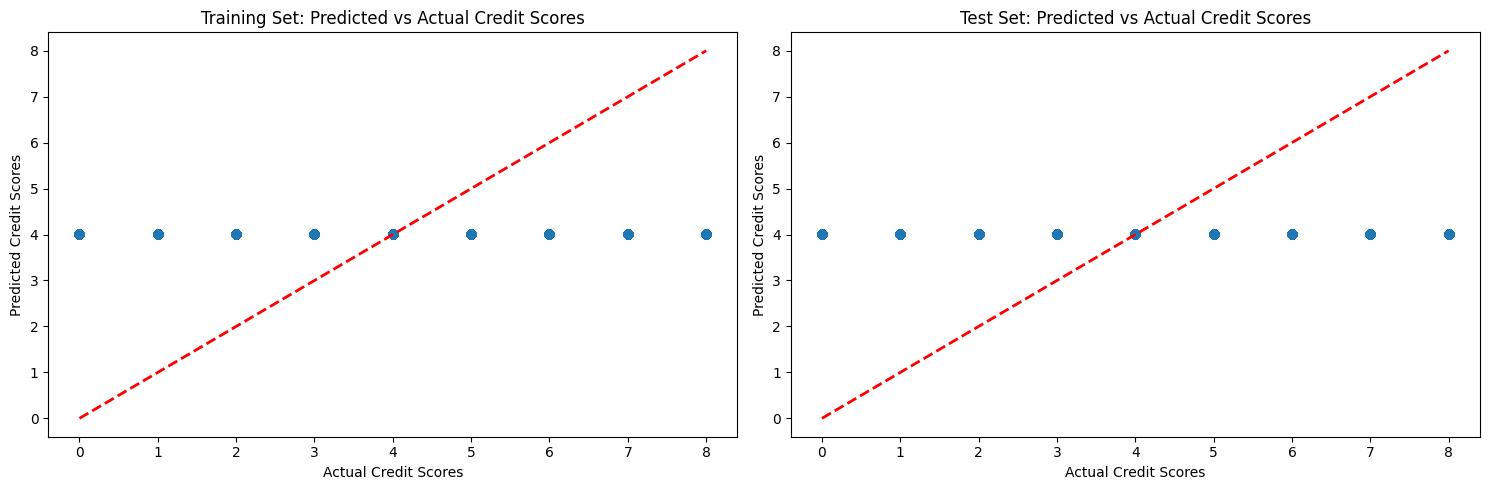


Model Performance Metrics:
Training MSE: 6.66
Test MSE: 6.67
Training R² Score: 0.000
Test R² Score: -0.000


In [11]:
# Evaluate the pre-trained model
train_predictions = credit_score_model.predict(X_train)
test_predictions = credit_score_model.predict(test_processed)

# Create evaluation plots
plt.figure(figsize=(15, 5))

# Plot 1: Training predictions vs actual
plt.subplot(1, 2, 1)
plt.scatter(y_self_supervised, train_predictions, alpha=0.5)
plt.plot([y_self_supervised.min(), y_self_supervised.max()], 
         [y_self_supervised.min(), y_self_supervised.max()], 
         'r--', lw=2)
plt.xlabel('Actual Credit Scores')
plt.ylabel('Predicted Credit Scores')
plt.title('Training Set: Predicted vs Actual Credit Scores')

# Plot 2: Test predictions vs actual 
plt.subplot(1, 2, 2)
plt.scatter(y_self_supervised_test, test_predictions, alpha=0.5)
plt.plot([y_self_supervised_test.min(), y_self_supervised_test.max()],
         [y_self_supervised_test.min(), y_self_supervised_test.max()],
         'r--', lw=2)
plt.xlabel('Actual Credit Scores')
plt.ylabel('Predicted Credit Scores')
plt.title('Test Set: Predicted vs Actual Credit Scores')

plt.tight_layout()
plt.show()

# Calculate and display metrics
train_mse = mean_squared_error(y_self_supervised, train_predictions)
test_mse = mean_squared_error(y_self_supervised_test, test_predictions)
train_r2 = r2_score(y_self_supervised, train_predictions)
test_r2 = r2_score(y_self_supervised_test, test_predictions)

print("\nModel Performance Metrics:")
print(f"Training MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Training R² Score: {train_r2:.3f}")
print(f"Test R² Score: {test_r2:.3f}")


In [12]:
# Save the trained model for transfer learning
model_save_path = 'credit_score_pretrained_model.h5'
credit_score_model.save(model_save_path)
print(f"\nModel saved to: {model_save_path}")



Model saved to: credit_score_pretrained_model.h5


## 4-Use model for transfer learning to get better results


In [13]:
# Load the pre-trained model from file
credit_score_model = tf.keras.models.load_model('credit_score_pretrained_model.h5', 
                                              compile=False)
credit_score_model.compile(optimizer='adam', 
                         loss='mse',
                         metrics=['mse'])
print("Pre-trained model loaded successfully")

# Check for data issues that could cause NaN losses
def validate_data(X, y, model_name="Data"):
    # Check for NaN/infinite values
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        raise ValueError(f"{model_name}: Input features contain NaN or infinite values")
    if np.any(np.isnan(y)) or np.any(np.isinf(y)):
        raise ValueError(f"{model_name}: Target values contain NaN or infinite values")
        
    # Check for zero/negative values that could cause log issues
    if np.any(y <= 0):
        raise ValueError(f"{model_name}: Target contains zero or negative values which will cause issues with log calculations")
        
    # Check for extreme values that could cause numerical instability
    if np.any(np.abs(X) > 1e6):
        raise ValueError(f"{model_name}: Input features contain extreme values (>1e6) that may cause numerical instability")
    if np.any(np.abs(y) > 1e6):
        raise ValueError(f"{model_name}: Target contains extreme values (>1e6) that may cause numerical instability")
        
    print(f"{model_name} validation passed")

# Validate training data
validate_data(X_train, y_train, "Training data")

# Check credit score model predictions for training data
train_preds = credit_score_model.predict(X_train)
validate_data(train_preds, y_train, "Credit score model training predictions")

print("\nAll validation checks passed - data and model predictions look valid for transfer learning")


Pre-trained model loaded successfully
Training data validation passed
37500/37500 ━━━━━━━━━━━━━━━━━━━━ 18s 474us/step
Credit score model training predictions validation passed

All validation checks passed - data and model predictions look valid for transfer learning


In [14]:
# Load the pre-trained credit score model
base_model = credit_score_model

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by excluding the last layer of the base model
base_model_truncated = tf.keras.Model(
    inputs=base_model.input,
    outputs=base_model.layers[-2].output  # Output of the second-to-last layer
)

# Create transfer learning model
input_layer = tf.keras.layers.Input(shape=base_model.input_shape[1:])
base_output = base_model_truncated(input_layer)

# Add new layers for transfer learning
x = tf.keras.layers.Dense(256, activation='relu')(base_output)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='relu')(x)  # Ensure non-negative predictions

# Combine into the final model
model = tf.keras.Model(inputs=input_layer, outputs=output)

# Custom RMSLE loss function with clipping to prevent NaN
def rmsle_loss(y_true, y_pred):
    epsilon = 1e-6
    y_pred = tf.clip_by_value(y_pred, epsilon, float('inf'))
    y_true = tf.clip_by_value(y_true, epsilon, float('inf'))
    return tf.sqrt(tf.reduce_mean(
        tf.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))
    ))

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=rmsle_loss,
    metrics=[rmsle_loss, 'mae']
)

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    verbose=1,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    mode='min',
    verbose=1
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


AttributeError: The layer sequential has never been called and thus has no defined input.

In [ ]:
# Save the trained transfer learning model
model.save('insurance_premium_model.h5')
print("Model saved successfully as 'insurance_premium_model.h5'")


## 5- Evaluate the model


In [ ]:
# Make predictions on validation data
val_predictions = model.predict(X_train[int(0.8*len(X_train)):])
val_actual = y_train[int(0.8*len(y_train)):]

# Calculate validation metrics
val_loss = mean_squared_error(val_actual, val_predictions)
val_mae = mean_absolute_error(val_actual, val_predictions)
val_r2 = r2_score(val_actual, val_predictions)

print(f"\nValidation Loss (MSE): {val_loss:.2f}")
print(f"Validation MAE: {val_mae:.2f}")
print(f"Validation R-squared Score: {val_r2:.4f}")

# Create scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(val_actual, val_predictions, alpha=0.5)
plt.plot([val_actual.min(), val_actual.max()], [val_actual.min(), val_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Premium Amount')
plt.ylabel('Predicted Premium Amount')
plt.title('Actual vs Predicted Premium Amounts (Validation Set)')
plt.tight_layout()
plt.show()

# Plot residuals
residuals = val_actual - val_predictions.flatten()
plt.figure(figsize=(10, 6))
plt.scatter(val_predictions.flatten(), residuals, alpha=0.5)
plt.xlabel('Predicted Premium Amount')
plt.ylabel('Residuals')
plt.title('Residual Plot (Validation Set)')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

# Plot error distribution
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors (Validation Set)')
plt.tight_layout()
plt.show()

# Plot training metrics over epochs
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


## 6- Generate Results


In [ ]:
# Make predictions on training data using transfer model
train_predictions = transfer_model.predict(train_processed)

# Create DataFrame with ID and predictions
results_df = pd.DataFrame({
    'id': train_df['id'],
    'Premium Amount': train_predictions.flatten()
})

# Save predictions to CSV
results_df.to_csv('train_predictions.csv', index=False)


